# Creating a GAN

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1 - Data

In [172]:
from tensorflow.keras.datasets import mnist

In [173]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Checking Data

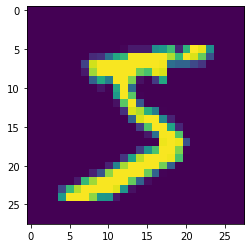

In [174]:
plt.imshow(X_train[0])

In [175]:
y_train[0]

5

### Choosing 9 only from Dataset

**Mainly because i have seen models not correctly predicting 9. This is just a bit of a test because i thought 9 would be hard to predict**

In [176]:
only_nines = X_train[y_train == 0]

In [177]:
only_nines.shape

(5923, 28, 28)

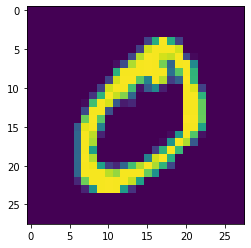

In [178]:
plt.imshow(only_nines[0])

## Part 2 - Model

In [179]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape 

### Creating Discriminator

In [180]:
discriminator = Sequential()

discriminator.add(Flatten(input_shape = [28, 28]))
discriminator.add(Dense(units = 200, activation = 'relu'))
discriminator.add(Dense(units = 100, activation = 'relu'))

discriminator.add(Dense(units = 1, activation = 'sigmoid'))

discriminator.compile(loss = 'binary_crossentropy', optimizer = 'adam')

### Creating Generator

In [181]:
coding_size = 100

generator = Sequential()

generator.add(Dense(units = 100, activation = 'relu', input_shape = [coding_size]))
generator.add(Dense(units = 200, activation = 'relu'))
generator.add(Dense(units = 784, activation = 'relu'))
generator.add(Reshape([28, 28]))

### Creating Generative Adversial Model

In [182]:
gan = Sequential([generator, discriminator])

In [183]:
discriminator.traininable = False

In [184]:
gan.compile(loss = 'binary_crossentropy', optimizer = 'adam')

## Part 3 - Training Model / Training Batches

In [185]:
batch_size = 32

In [186]:
my_data = only_nines

In [187]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size = 1000)

In [188]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [189]:
dataset = dataset.batch(batch_size = batch_size, drop_remainder = True).prefetch(1)        #### drop_remanider is just 5949/32 and drop the remainder

### Training Model

In [190]:
epochs = 1

In [191]:
gan.layers[0].layers

In [192]:
gan.layers[1].layers

In [193]:
generator, disriminator = gan.layers

for epoch in range(epochs):
  print(f"Currently on Epoch {epoch+1}")
  i = 0

  for X_batch in dataset:

    i = i+1

    if i%100 == 0:
      print(f"\t Currently on Batch Number {i} of {len(my_data)//batch_size}")

    # Discriminator Training Phase

    noise = tf.random.normal(shape = [batch_size, coding_size])

    gen_images = generator(noise)

    X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch, tf.float32)], axis = 0)

    y1 = tf.constant([[0.0]] * batch_size + [[1.0]] * batch_size)                 ### first 0's indicate fake and then 1's indicate real

    disriminator.traininable = True

    disriminator.train_on_batch(X_fake_vs_real, y1)


    # Generator Training Phase

    noise = tf.random.normal(shape = [batch_size, coding_size])

    y2 = tf.constant([[1.0]] * batch_size)

    disriminator.traininable = False

    gan.train_on_batch(noise, y2)

Currently on Epoch 1
	 Currently on Batch Number 100 of 185


### Testing

In [194]:
noise = tf.random.normal(shape = [10, coding_size])

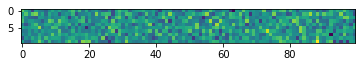

In [195]:
plt.imshow(noise)

In [196]:
images = generator(noise)

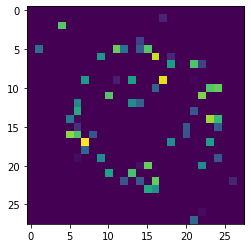

In [197]:
plt.imshow(images[0])

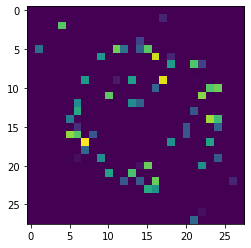

In [198]:
plt.imshow(images[2])